In [1]:
import sys, os
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# define data path 
train_data_path = '../data/train.csv'
store_data_path = '../data/store.csv'
sample_data_path = '../data/sample_submission.csv'
test_data_path = '../data/test.csv'

In [3]:
# Load the data into pandas dataframe
train_df = pd.read_csv(train_data_path)
store_df = pd.read_csv(store_data_path)
sample_df = pd.read_csv(sample_data_path)
test_df = pd.read_csv(test_data_path)

In [4]:
print(store_df.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from datetime import datetime

# Convert non-numeric columns to numeric using LabelEncoder for categorical columns
label_encoders = {}
for col in ['StoreType', 'Assortment', 'PromoInterval', 'StateHoliday']:
    if col in store_df.columns:
        label_encoders[col] = LabelEncoder()
        store_df[col] = label_encoders[col].fit_transform(store_df[col].fillna('None'))

    if col in test_df.columns:
        label_encoders[col] = LabelEncoder()
        test_df[col] = label_encoders[col].fit_transform(test_df[col].fillna('None'))

# Handle missing values - fill NaNs with a placeholder or average
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace=True)
store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].mode()[0], inplace=True)
store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].mode()[0], inplace=True)
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)

# Convert 'Date' to datetime format in test_df and train_df
test_df['Date'] = pd.to_datetime(test_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])


# Extract new features from the Date column from test and train data
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['DayOfWeek'] = test_df['Date'].dt.dayofweek
test_df['IsMonthEnd'] = test_df['Date'].dt.is_month_end.astype(int)
test_df['IsMonthStart'] = test_df['Date'].dt.is_month_start.astype(int)
test_df['WeekOfYear'] = test_df['Date'].dt.isocalendar().week
test_df['Quarter'] = test_df['Date'].dt.quarter

train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek
train_df['IsMonthEnd'] = train_df['Date'].dt.is_month_end.astype(int)
train_df['IsMonthStart'] = train_df['Date'].dt.is_month_start.astype(int)
train_df['WeekOfYear'] = train_df['Date'].dt.isocalendar().week
train_df['Quarter'] = train_df['Date'].dt.quarter


# Scale the numerical features using StandardScaler
scaler = StandardScaler()
numerical_features = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']

store_df[numerical_features] = scaler.fit_transform(store_df[numerical_features])

# Display the updated test and store dataframes
store_df.head(), test_df.head(), train_df.head()


(   Store  StoreType  Assortment  CompetitionDistance  \
 0      1          2           0            -0.539351   
 1      2          0           0            -0.630841   
 2      3          0           0             1.141458   
 3      4          2           2            -0.624306   
 4      5          0           0             3.203912   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
 0                   0.436181                 -0.371736       0   
 1                   1.156153                 -0.553608       1   
 2                   1.516140                 -0.735480       1   
 3                   0.436181                 -0.189864       0   
 4                  -1.363751                  0.901367       0   
 
    Promo2SinceWeek  Promo2SinceYear  PromoInterval  
 0        -0.439083        -0.311105              3  
 1        -0.528439        -1.106705              1  
 2        -0.439083        -0.311105              1  
 3        -0.439083        -0.311105

In [6]:
print(test_df.isnull().sum())

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
Year              0
Month             0
IsMonthEnd        0
IsMonthStart      0
WeekOfYear        0
Quarter           0
dtype: int64


In [7]:
# Fill missing 'Open' values with the mode (most frequent value)
test_df['Open'].fillna(test_df['Open'].mode()[0], inplace=True)


In [8]:
print(test_df.isnull().sum())

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
IsMonthEnd       0
IsMonthStart     0
WeekOfYear       0
Quarter          0
dtype: int64


In [9]:
print(test_df.isnull().sum())

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
IsMonthEnd       0
IsMonthStart     0
WeekOfYear       0
Quarter          0
dtype: int64


In [10]:
print(train_df.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
IsMonthEnd       0
IsMonthStart     0
WeekOfYear       0
Quarter          0
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is the target variable (for example, Open in your case)

# Drop non-numeric and irrelevant columns (we already handled this in the preprocessing steps)
X = test_df.drop(columns=['Id', 'Date', 'Open'])  # Adjust based on your data
y = test_df['Open']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are scaled and can be used for any machine learning algorithm


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Assuming X is the feature set and y is the target variable 'Open'

# Split the data into training and test sets
X = test_df.drop(columns=['Id', 'Date', 'Open'])  
y = test_df['Open']

# Handle any missing values in the target variable 'Open'
y.fillna(y.mode()[0], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('regressor', RandomForestRegressor(random_state=42))  # Random Forest model
])

# Fit the model using the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Output the cross-validation scores (MSE)
print("Cross-validation scores (MSE):", cv_scores)
print("Mean CV MSE:", cv_scores.mean())


Cross-validation scores (MSE): [-0.00138477 -0.00169413 -0.00157431 -0.00067381 -0.00180657]
Mean CV MSE: -0.0014267173714633404


## Post Prediction Analysis

In [13]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
# Predict on test data
y_test_pred = pipeline.predict(X_test)

# Calculate MSE and MAE on test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")


Test MSE: 0.0015226697493307376
Test MAE: 0.0025006084205402776


## Explore Feature Importance

In [14]:
import pandas as pd

# Extract feature importances from the random forest
feature_importances = pipeline.named_steps['regressor'].feature_importances_

# Create a DataFrame for easier visualization
features_df = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(features_df)


          Feature  Importance
1       DayOfWeek    0.929838
0           Store    0.041737
3    StateHoliday    0.026914
9      WeekOfYear    0.000952
2           Promo    0.000214
4   SchoolHoliday    0.000201
6           Month    0.000073
8    IsMonthStart    0.000070
5            Year    0.000000
7      IsMonthEnd    0.000000
10        Quarter    0.000000


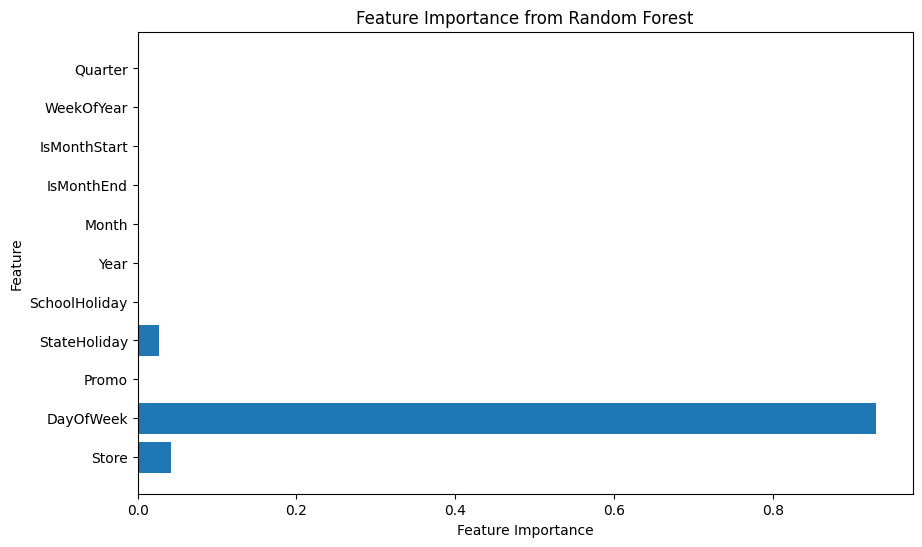

In [15]:
import matplotlib.pyplot as plt

# Get feature importances from the random forest model
feature_importances = pipeline.named_steps['regressor'].feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


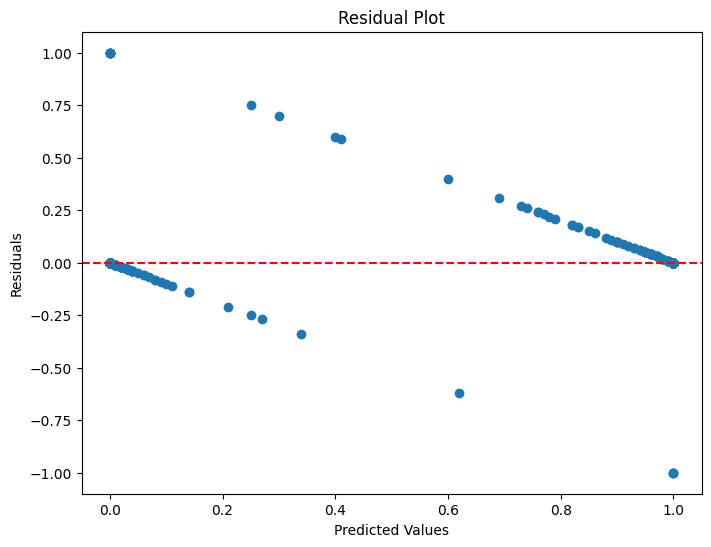

In [16]:
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


## Estimating Confidance Intervals

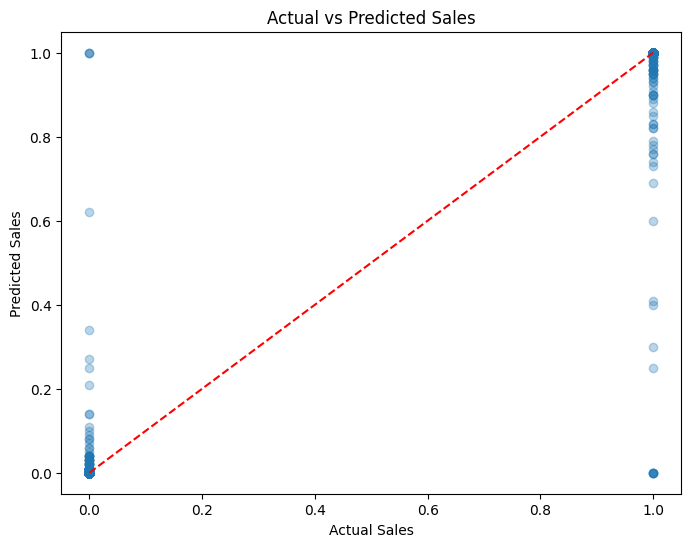

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


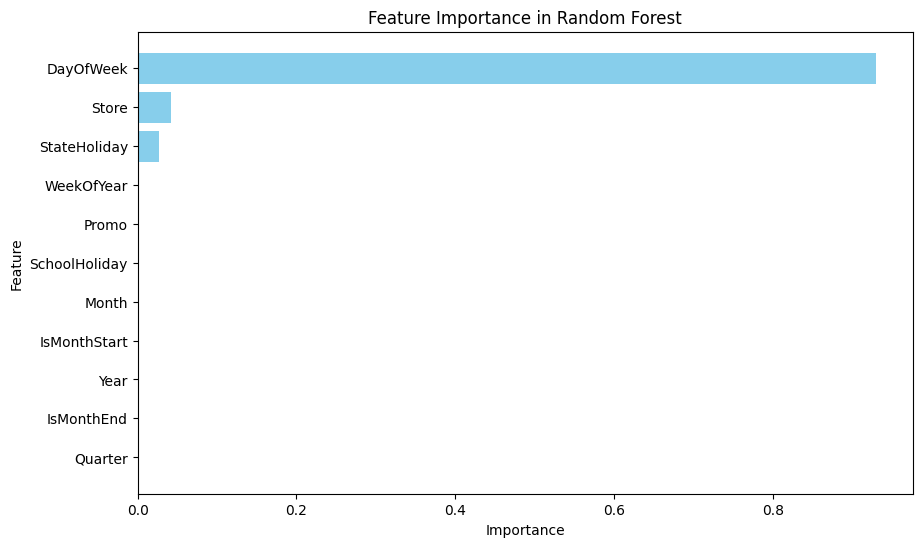

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances
importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.show()


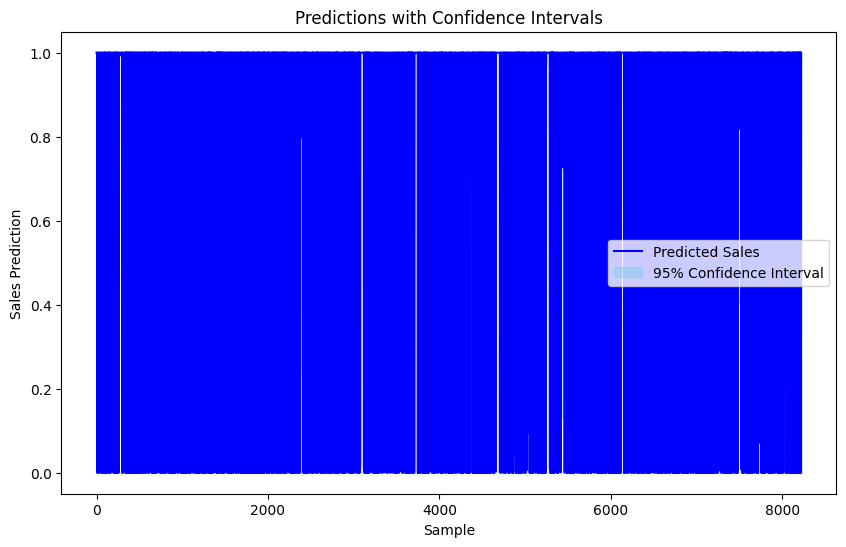

In [20]:
from sklearn.utils import resample

def bootstrap_predictions(pipeline, X_train, y_train, X_test, n_bootstrap=100):
    predictions = []

    for _ in range(n_bootstrap):
        # Resample the training data
        X_resample, y_resample = resample(X_train, y_train)
        # Fit the model on the resampled data
        pipeline.fit(X_resample, y_resample)
        # Make predictions on the test set
        predictions.append(pipeline.predict(X_test))

    return np.array(predictions)

# Generate bootstrap predictions
bootstrap_preds = bootstrap_predictions(pipeline, X_train, y_train, X_test, n_bootstrap=100)

# Calculate the mean and 95% confidence interval for each prediction
mean_preds = np.mean(bootstrap_preds, axis=0)
lower_ci = np.percentile(bootstrap_preds, 2.5, axis=0)
upper_ci = np.percentile(bootstrap_preds, 97.5, axis=0)

# Plot the predictions with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(mean_preds, label='Predicted Sales', color='blue')
plt.fill_between(np.arange(len(mean_preds)), lower_ci, upper_ci, color='skyblue', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Sample')
plt.ylabel('Sales Prediction')
plt.title('Predictions with Confidence Intervals')
plt.legend()
plt.show()


## Serialize models

In [21]:
import joblib
from datetime import datetime

# Define the timestamp format
timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')

# Specify the filename with the timestamp
model_filename = f'model-{timestamp}.pkl'


# Save the pipeline (or model)
joblib.dump(pipeline, model_filename)

print(f'Model saved as: {model_filename}')


Model saved as: model-23-09-2024-18-02-48-404689.pkl


In [22]:
import joblib

# Load the model using the correct filename
loaded_model = joblib.load('model-22-09-2024-13-36-44-922453.pkl')

# Now you can make predictions with the loaded model
predictions = loaded_model.predict(X_test)

print(predictions)


[1. 1. 1. ... 1. 0. 1.]


In [23]:
print(type(loaded_model))


<class 'sklearn.pipeline.Pipeline'>


In [24]:
loaded_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [24]:
# Check if the loaded model is a classifier or regressor
print(f"Model type: {type(loaded_model)}")

# Check if the target variable during training was binary
print(f"Unique values in the target variable: {np.unique(y_train)}")

# If it's a classifier, check the predicted probabilities
if hasattr(loaded_model, "predict_proba"):
    probabilities = loaded_model.predict_proba(X_test)
    print(probabilities[:5])  # Print the first 5 probabilities

# Check the shape of the test input to ensure it's correct
print(f"X_test shape: {X_test.shape}")


Model type: <class 'sklearn.pipeline.Pipeline'>
Unique values in the target variable: [0. 1.]
X_test shape: (8218, 11)


In [25]:
print(train_df.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
IsMonthEnd       0
IsMonthStart     0
WeekOfYear       0
Quarter          0
dtype: int64


In [26]:
# Merge the dataframes on the 'Store' column
merged_df = pd.merge(train_df, store_df, on='Store', how='left')

In [27]:
print(merged_df.isnull().sum())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
IsMonthEnd                   0
IsMonthStart                 0
WeekOfYear                   0
Quarter                      0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [28]:
# Convert 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [29]:
# Set the 'Date' column as the index
merged_df.set_index('Date', inplace=True)

In [30]:
# Isolating the Sales data for time series analysis
sales_data = merged_df[['Sales']].sort_index()

<Axes: title={'center': 'Store Sales Over Time'}, xlabel='Date'>

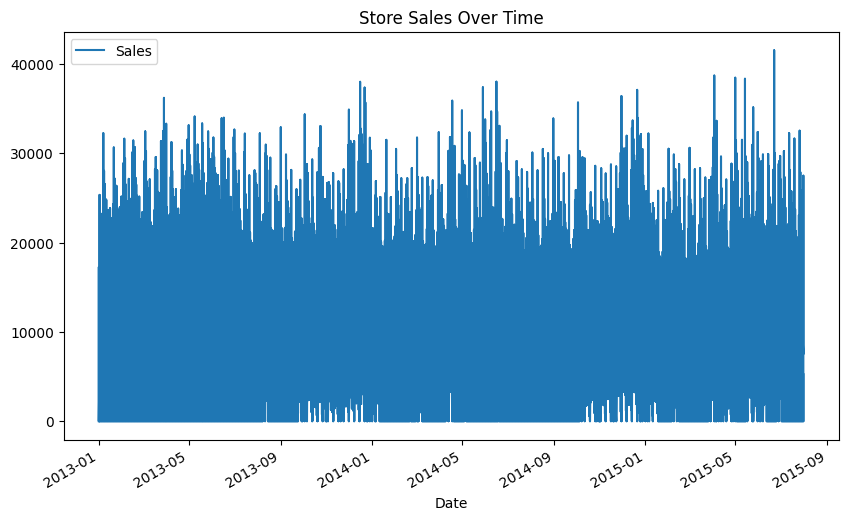

In [31]:
# Visualize the sales data over time
sales_data.plot(figsize=(10, 6), title='Store Sales Over Time')

## Checking for Stationarity of the time Series Data

In [32]:
from statsmodels.tsa.stattools import adfuller
# Downsample sales data to monthly
weekly_sales_data = sales_data['Sales'].resample('M').sum()

# Perform the ADF test on the downsampled data
adf_result = adfuller(weekly_sales_data)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


ADF Statistic: -3.544365436259655
p-value: 0.0069181756365769885


In [33]:
# Randomly sample 100 rows
sample_sales_data = sales_data['Sales'].sample(n=100, random_state=42)

# Perform the ADF test on the sampled data
adf_result = adfuller(sample_sales_data)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


ADF Statistic: -9.225688814441419
p-value: 1.7317296396210124e-15


In [40]:
from statsmodels.tsa.stattools import adfuller

window_size = 100  # Define the window size

# Loop over the data in windows
for i in range(0, len(sales_data), window_size):
    window_data = sales_data['Sales'][i:i + window_size]
    
    # Check if the window contains constant values
    if np.all(window_data == window_data.iloc[0]):
        print(f"Window {i}: Skipped due to constant values.")
        continue
    
    # Perform ADF test if data is not constant
    adf_result = adfuller(window_data)
    print(f"Window {i}: ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}")


Window 0: ADF Statistic: -9.949874371066214, p-value: 2.5313777670252746e-17
Window 100: ADF Statistic: -8.798142007802602, p-value: 2.1483596848481927e-14
Window 200: ADF Statistic: -9.949874371066187, p-value: 2.531377767025639e-17
Window 300: ADF Statistic: -9.949874371066217, p-value: 2.5313777670251837e-17
Window 400: ADF Statistic: -4.093530441953198, p-value: 0.0009926494363957728
Window 500: Skipped due to constant values.
Window 600: ADF Statistic: -9.949874371066214, p-value: 2.5313777670252746e-17
Window 700: ADF Statistic: -9.949874371066187, p-value: 2.531377767025639e-17
Window 800: ADF Statistic: -9.949874371066201, p-value: 2.5313777670254022e-17
Window 900: ADF Statistic: -10.127345583876185, p-value: 9.107833790200204e-18
Window 1000: Skipped due to constant values.
Window 1100: ADF Statistic: -3.798307206519412, p-value: 0.0029246820469841185
Window 1200: ADF Statistic: -10.532979334017162, p-value: 9.050927714548761e-19
Window 1300: ADF Statistic: -9.342602184256547

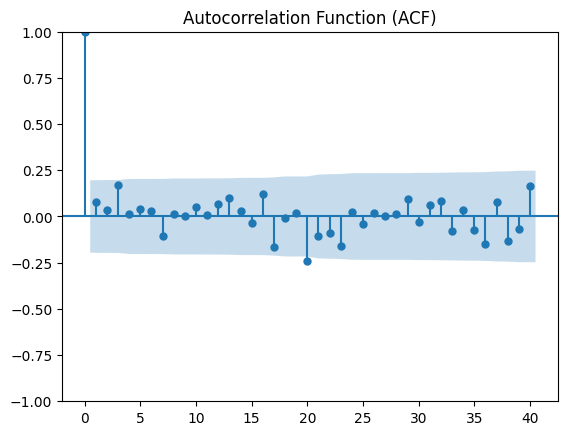

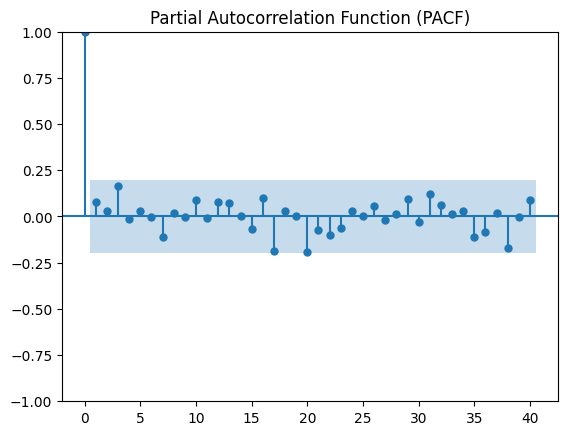

In [34]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(sample_sales_data, lags=40)  # checking autocorrelation up to 40 lags
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(sample_sales_data, lags=40)  # lags=40 means checking partial autocorrelation up to 40 lags
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


## Sliding Window for Time Series

In [35]:
import pandas as pd
import numpy as np

def create_sliding_window_data(data, window_size=100):
    """
    Convert time series data into a supervised learning problem using sliding window technique.
    
    Parameters:
    data: Array or Series, time series data (e.g., sales data).
    window_size: The number of previous time steps to use as input features.
    
    Returns:
    X: DataFrame containing the input sequences (past sales).
    y: Series containing the next sale (target value).
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])  # past sales (inputs)
        y.append(data[i+window_size])    # next sale (output)
    return np.array(X), np.array(y)


In [36]:
# Assuming you already have sample_sales_data created
window_size = 10  # You can adjust this size depending on how much past data you want to use
X, y = create_sliding_window_data(sample_sales_data.values, window_size)

# Converting to DataFrame for easy viewing
X_df = pd.DataFrame(X, columns=[f'lag_{i+1}' for i in range(window_size)])
y_df = pd.Series(y, name='Next_Sale')

# Show first few rows of the sliding window data
result = pd.concat([X_df, y_df], axis=1)
result.head()


,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,Next_Sale
0,0,7574,5863,7418,8918,6317,8324,7354,3670,7976,9122
1,7574,5863,7418,8918,6317,8324,7354,3670,7976,9122,4224
2,5863,7418,8918,6317,8324,7354,3670,7976,9122,4224,7490
3,7418,8918,6317,8324,7354,3670,7976,9122,4224,7490,12196
4,8918,6317,8324,7354,3670,7976,9122,4224,7490,12196,12512


## Scaling the Data in the(-1,1) Range

In [42]:
# Reshape y_scaled to be 1-dimensional
y_scaled_flat = y_scaled.ravel()  # or use y_scaled.flatten()

# Convert the reshaped y_scaled into a Pandas Series
y_scaled_df = pd.Series(y_scaled_flat, name='Next_Sale')

# Show the first few rows of the scaled sliding window data
result_scaled = pd.concat([X_scaled_df, y_scaled_df], axis=1)

# Display the resulting DataFrame
print(result_scaled.head())


      lag_1     lag_2     lag_3     lag_4     lag_5     lag_6     lag_7  \
0 -1.000000 -0.079597 -0.287520 -0.098554  0.083728 -0.232349  0.011545   
1 -0.079597 -0.287520 -0.098554  0.083728 -0.232349  0.011545 -0.106331   
2 -0.287520 -0.098554  0.083728 -0.232349  0.011545 -0.106331 -0.554016   
3 -0.098554  0.083728 -0.232349  0.011545 -0.106331 -0.554016 -0.030745   
4  0.083728 -0.232349  0.011545 -0.106331 -0.554016 -0.030745  0.108519   

      lag_8     lag_9    lag_10  Next_Sale  
0 -0.106331 -0.554016 -0.030745   0.108519  
1 -0.554016 -0.030745  0.108519  -0.486693  
2 -0.030745  0.108519 -0.486693  -0.089804  
3  0.108519 -0.486693 -0.089804   0.482076  
4 -0.486693 -0.089804  0.482076   0.520476  


In [39]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler for the range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler on your sample_sales_data and transform the data
sample_sales_data_scaled = scaler.fit_transform(sample_sales_data.values.reshape(-1, 1))

# Now apply the sliding window technique on the scaled data
window_size = 10  # You can adjust this size based on your model needs
X_scaled, y_scaled = create_sliding_window_data(sample_sales_data_scaled, window_size)

# Convert the X and y into DataFrame and Series for better readability
X_scaled_df = pd.DataFrame(X_scaled.reshape(-1, window_size), columns=[f'lag_{i+1}' for i in range(window_size)])

# Reshape y_scaled to 1-dimensional for Pandas Series
y_scaled_flat = y_scaled.ravel()  # or you can use y_scaled.flatten()

# Convert the reshaped y_scaled into a Pandas Series
y_scaled_df = pd.Series(y_scaled_flat, name='Next_Sale')

# Show the first few rows of the scaled sliding window data
result_scaled = pd.concat([X_scaled_df, y_scaled_df], axis=1)
result_scaled.head()


,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,Next_Sale
0,-1.000000,-0.079597,-0.287520,-0.098554,0.083728,-0.232349,0.011545,-0.106331,-0.554016,-0.030745,0.108519
1,-0.079597,-0.287520,-0.098554,0.083728,-0.232349,0.011545,-0.106331,-0.554016,-0.030745,0.108519,-0.486693
2,-0.287520,-0.098554,0.083728,-0.232349,0.011545,-0.106331,-0.554016,-0.030745,0.108519,-0.486693,-0.089804
3,-0.098554,0.083728,-0.232349,0.011545,-0.106331,-0.554016,-0.030745,0.108519,-0.486693,-0.089804,0.482076
4,0.083728,-0.232349,0.011545,-0.106331,-0.554016,-0.030745,0.108519,-0.486693,-0.089804,0.482076,0.520476


## Building the LSTM Model

In [43]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [44]:
# Sample sales data
sample_sales_data = sales_data['Sales'].sample(n=100, random_state=42)

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
sample_sales_data_scaled = scaler.fit_transform(sample_sales_data.values.reshape(-1, 1))

# Create sliding windows (assume you have this function defined)
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 5  # Example window size
X, y = create_sliding_window(sample_sales_data_scaled, window_size)

# Reshape the input to be 3D [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Epoch 1/50
5/5 - 3s - 628ms/step - loss: 0.2743 - val_loss: 0.3082
Epoch 2/50
5/5 - 0s - 19ms/step - loss: 0.2391 - val_loss: 0.2928
Epoch 3/50
5/5 - 0s - 18ms/step - loss: 0.2193 - val_loss: 0.2858
Epoch 4/50
5/5 - 0s - 20ms/step - loss: 0.2120 - val_loss: 0.2858
Epoch 5/50
5/5 - 0s - 19ms/step - loss: 0.2119 - val_loss: 0.2883
Epoch 6/50
5/5 - 0s - 20ms/step - loss: 0.2132 - val_loss: 0.2891
Epoch 7/50
5/5 - 0s - 19ms/step - loss: 0.2122 - val_loss: 0.2874
Epoch 8/50
5/5 - 0s - 21ms/step - loss: 0.2106 - val_loss: 0.2861
Epoch 9/50
5/5 - 0s - 21ms/step - loss: 0.2091 - val_loss: 0.2857
Epoch 10/50
5/5 - 0s - 21ms/step - loss: 0.2092 - val_loss: 0.2855
Epoch 11/50
5/5 - 0s - 23ms/step - loss: 0.2094 - val_loss: 0.2855
Epoch 12/50
5/5 - 0s - 25ms/step - loss: 0.2089 - val_loss: 0.2858
Epoch 13/50
5/5 - 0s - 22ms/step - loss: 0.2084 - val_loss: 0.2863
Epoch 14/50
5/5 - 0s - 21ms/step - loss: 0.2084 - val_loss: 0.2871
Epoch 15/50
5/5 - 0s - 20ms/step - loss: 0.2085 - val_loss: 0.2874
Epo

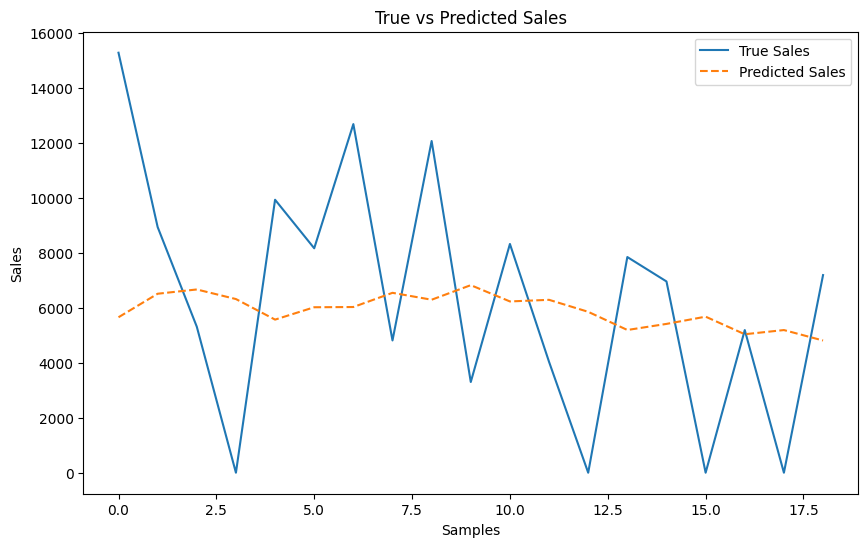

In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Sample sales data
sample_sales_data = sales_data['Sales'].sample(n=100, random_state=42)

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
sample_sales_data_scaled = scaler.fit_transform(sample_sales_data.values.reshape(-1, 1))

# Create sliding windows
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 30  # Example window size
X, y = create_sliding_window(sample_sales_data_scaled, window_size)

# Reshape the input to be 3D [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
model = tf.keras.Sequential()

# Add the LSTM layer
model.add(tf.keras.layers.LSTM(units=50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add the output layer (single neuron for regression)
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
y_pred = model.predict(X_test)

# Rescale the predicted and true values back to the original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='True Sales')
plt.plot(y_pred_rescaled, label='Predicted Sales', linestyle='--')
plt.title('True vs Predicted Sales')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.legend()
plt.show()



Epoch 1/50
4/4 - 3s - 687ms/step - loss: 0.2971 - val_loss: 0.2725
Epoch 2/50
4/4 - 0s - 30ms/step - loss: 0.2487 - val_loss: 0.2478
Epoch 3/50
4/4 - 0s - 29ms/step - loss: 0.2281 - val_loss: 0.2338
Epoch 4/50
4/4 - 0s - 29ms/step - loss: 0.2243 - val_loss: 0.2302
Epoch 5/50
4/4 - 0s - 32ms/step - loss: 0.2265 - val_loss: 0.2298
Epoch 6/50
4/4 - 0s - 29ms/step - loss: 0.2243 - val_loss: 0.2296
Epoch 7/50
4/4 - 0s - 30ms/step - loss: 0.2242 - val_loss: 0.2304
Epoch 8/50
4/4 - 0s - 28ms/step - loss: 0.2227 - val_loss: 0.2309
Epoch 9/50
4/4 - 0s - 29ms/step - loss: 0.2217 - val_loss: 0.2312
Epoch 10/50
4/4 - 0s - 31ms/step - loss: 0.2216 - val_loss: 0.2307
Epoch 11/50
4/4 - 0s - 30ms/step - loss: 0.2219 - val_loss: 0.2315
Epoch 12/50
4/4 - 0s - 38ms/step - loss: 0.2211 - val_loss: 0.2308
Epoch 13/50
4/4 - 0s - 34ms/step - loss: 0.2206 - val_loss: 0.2311
Epoch 14/50
4/4 - 0s - 32ms/step - loss: 0.2198 - val_loss: 0.2304
Epoch 15/50
4/4 - 0s - 27ms/step - loss: 0.2199 - val_loss: 0.2304
Epo

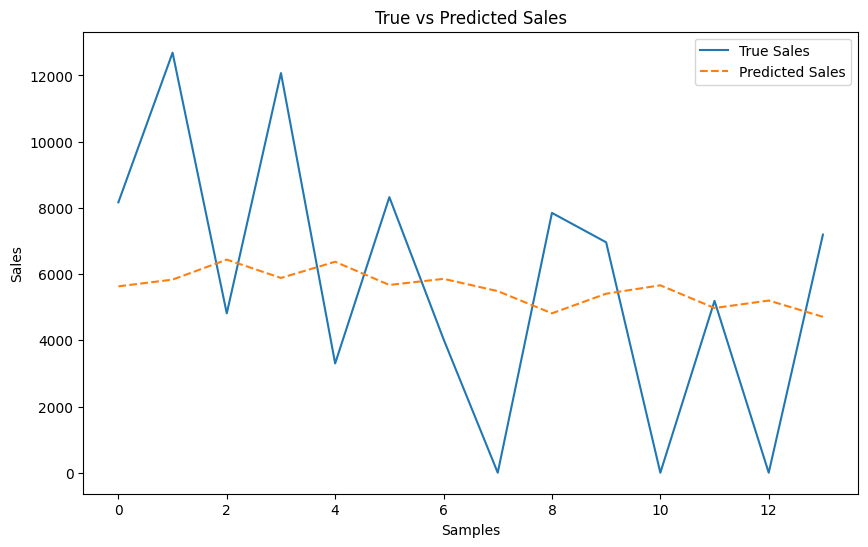

In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Sample sales data (assumed 'sales_data' exists in your environment)
sample_sales_data = sales_data['Sales'].sample(n=100, random_state=42)

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
sample_sales_data_scaled = scaler.fit_transform(sample_sales_data.values.reshape(-1, 1))

# Create sliding windows
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 30  # Example window size
X, y = create_sliding_window(sample_sales_data_scaled, window_size)

# Reshape the input to be 3D [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
model = tf.keras.Sequential()

# Add the LSTM layer
model.add(tf.keras.layers.LSTM(units=50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add the output layer (single neuron for regression)
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
y_pred = model.predict(X_test)

# Rescale the predicted and true values back to the original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='True Sales')
plt.plot(y_pred_rescaled, label='Predicted Sales', linestyle='--')
plt.title('True vs Predicted Sales')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [68]:
# Ensure X is shaped correctly
X = X.reshape((X.shape[0], X.shape[1], 1))


In [69]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (76, 5, 1)
y_train shape: (76,)


In [72]:
print(type(X_train), type(y_train))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [73]:
print(X_train.shape)  # Should output (76, 5, 1)


(76, 5, 1)


In [75]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [76]:
X_train = X_train.astype('float32')


In [78]:
print("X_train shape:", X_train.shape)  # Should print (76, 5, 1)


X_train shape: (76, 5, 1)


In [79]:
try:
    model.fit(X_train, y_train, epochs=10, batch_size=16)
except Exception as e:
    print("Error occurred:", e)


Error occurred: You must call `compile()` before using the model.


In [87]:
# Check the shape of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Confirm if X_train has 3 dimensions and y_train has 1 dimension
if len(X_train.shape) == 3:
    print("X_train is 3-dimensional")
else:
    print("X_train is not 3-dimensional")

if len(y_train.shape) == 1:
    print("y_train is 1-dimensional")
else:
    print("y_train is not 1-dimensional")


X_train shape: (76, 5, 1)
y_train shape: (76,)
X_train is 3-dimensional
y_train is 1-dimensional


In [88]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.17.0
Keras version: 3.5.0


In [89]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.17.0
Keras version: 3.5.0


In [1]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.17.0
Keras version: 3.5.0


In [3]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.17.0
Keras version: 3.5.0


In [86]:
print(X_train[:5])  # Print first 5 samples


[[[-1.        ]
  [-0.07959655]
  [-0.28751975]
  [-0.0985539 ]
  [ 0.08372828]]

 [[-0.07959655]
  [-0.28751975]
  [-0.0985539 ]
  [ 0.08372828]
  [-0.23234901]]

 [[-0.28751975]
  [-0.0985539 ]
  [ 0.08372828]
  [-0.23234901]
  [ 0.01154454]]

 [[-0.0985539 ]
  [ 0.08372828]
  [-0.23234901]
  [ 0.01154454]
  [-0.10633127]]

 [[ 0.08372828]
  [-0.23234901]
  [ 0.01154454]
  [-0.10633127]
  [-0.5540163 ]]]
